In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [71]:
data=pd.read_excel(r"C:\Users\rosha\Desktop\assignments\Decision Tree\heart_disease.xlsx",sheet_name="Heart_disease")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [72]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [73]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [74]:
data[data.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [75]:
data.drop(765,axis=0,inplace=True)

In [76]:
data[data.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [77]:
data.reset_index(drop=True,inplace=True)

In [78]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,845.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.094092,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [79]:
data.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,54,Male,asymptomatic,120,0,False,normal,140,False,0.0,flat,normal,0


In [80]:
object=data.select_dtypes(exclude="number")
object

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,False,normal,False,flat,fixed defect
2,Male,asymptomatic,False,normal,False,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,False,normal,True,flat,fixed defect
...,...,...,...,...,...,...,...
902,Male,asymptomatic,False,normal,False,upsloping,reversable defect
903,Male,asymptomatic,False,st-t abnormality,True,flat,reversable defect
904,Male,non-anginal,False,lv hypertrophy,True,downsloping,normal
905,Male,non-anginal,True,st-t abnormality,TURE,downsloping,fixed defect


In [81]:
for col in object :
    data[col]=data[col].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       907 non-null    int64   
 1   sex       907 non-null    category
 2   cp        907 non-null    category
 3   trestbps  907 non-null    int64   
 4   chol      907 non-null    int64   
 5   fbs       907 non-null    category
 6   restecg   907 non-null    category
 7   thalch    907 non-null    int64   
 8   exang     907 non-null    category
 9   oldpeak   845 non-null    float64 
 10  slope     907 non-null    category
 11  thal      907 non-null    category
 12  num       907 non-null    int64   
dtypes: category(7), float64(1), int64(5)
memory usage: 49.8 KB


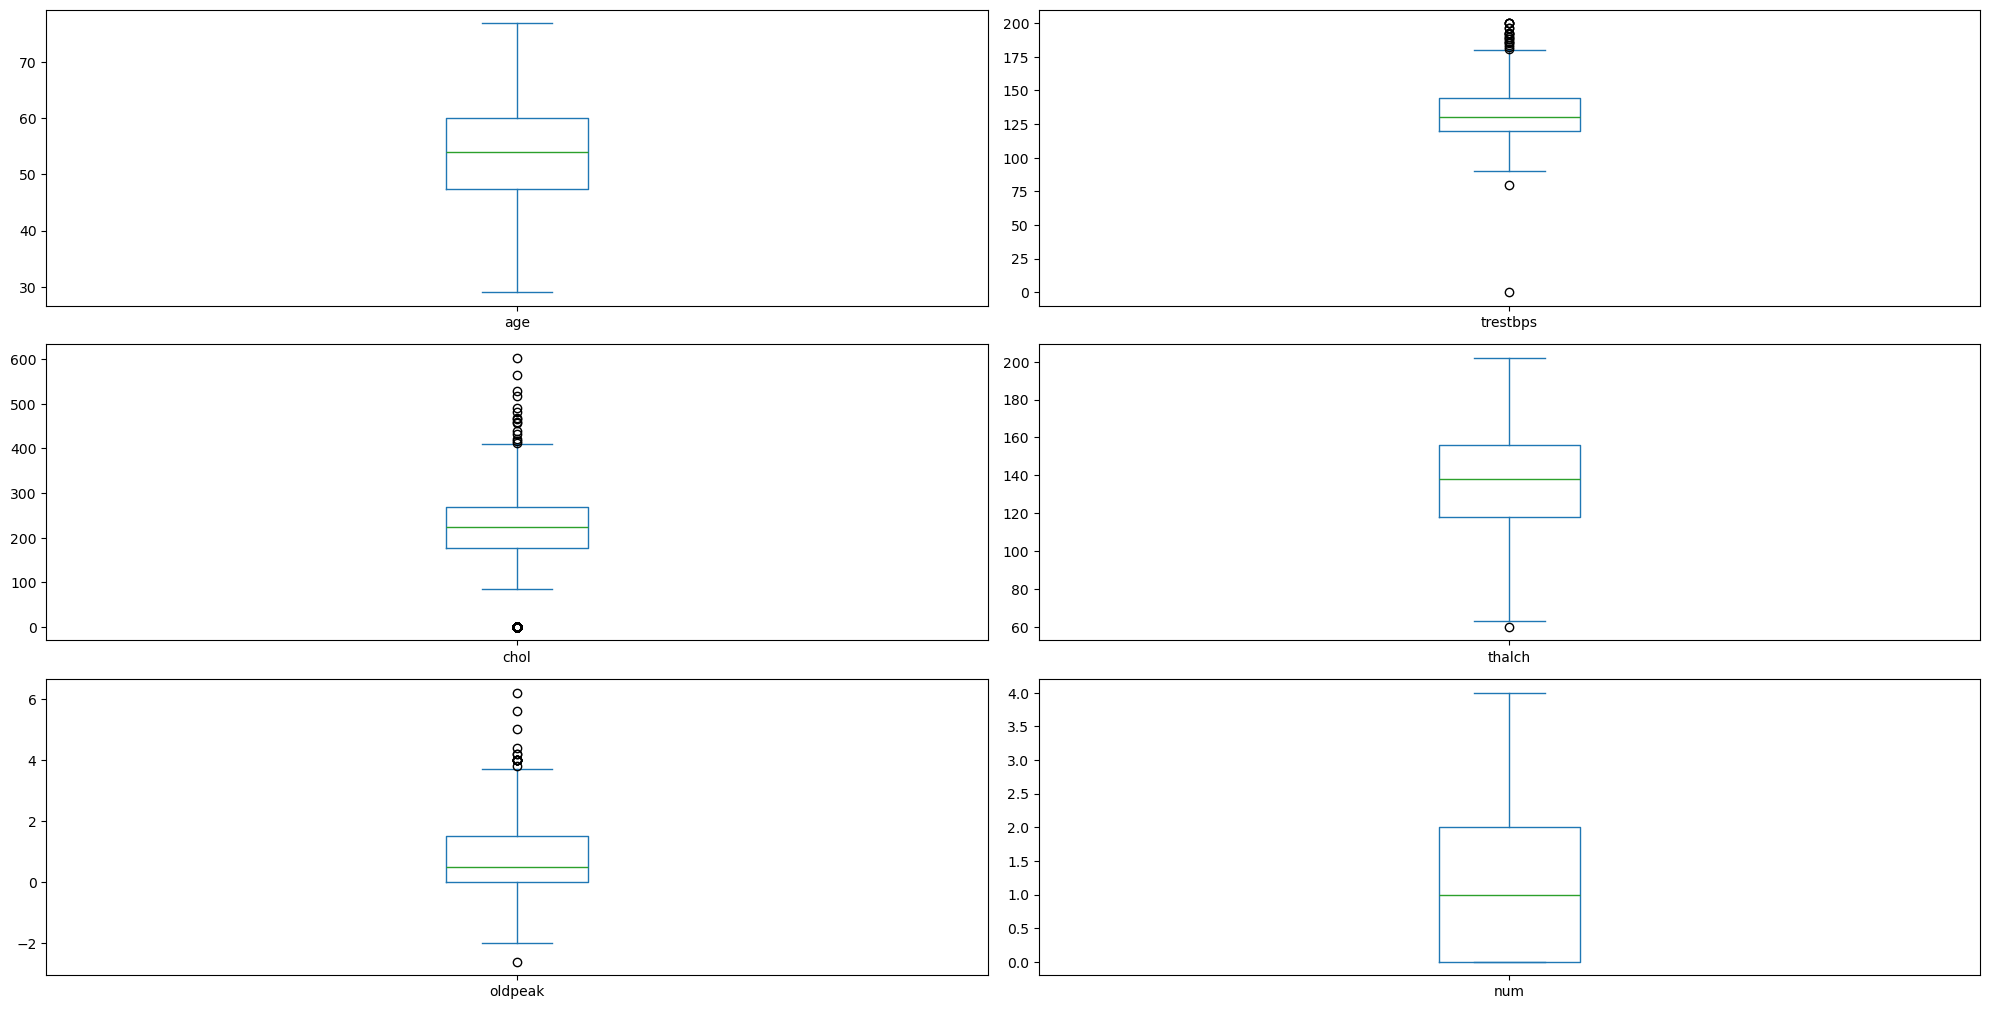

In [82]:
data.plot(kind="box",subplots=True,layout=(6,2),figsize=(20,20))
plt.tight_layout()
plt.show()

In [83]:
data.select_dtypes(include="number").skew()

age        -0.135354
trestbps    0.355942
chol       -0.563965
thalch     -0.221485
oldpeak     1.020056
num         0.954221
dtype: float64

In [84]:
data.oldpeak=data.oldpeak.fillna(data.oldpeak.median())

In [85]:
data.isnull().sum().sum()

0

we are using the decision tree model it won't affect by the outliers that why we are not treating the outliers for this 

In [86]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


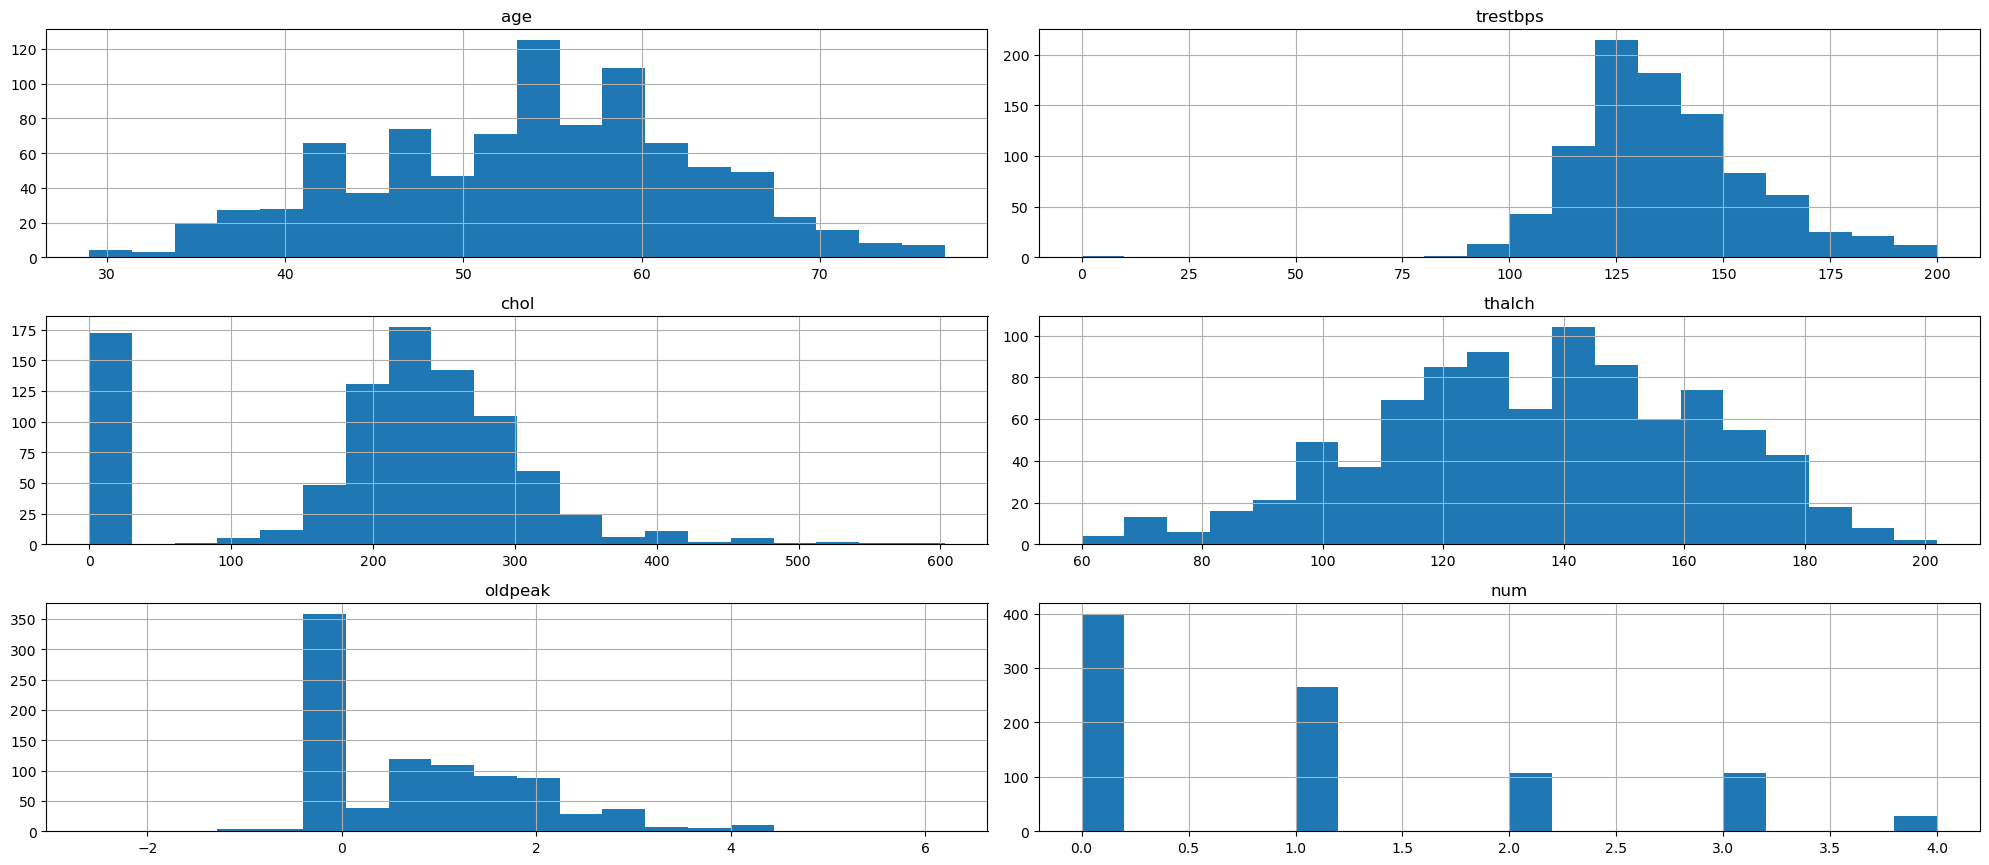

In [87]:
data.hist(bins=20,figsize=(20,20),layout=(7,2))
plt.tight_layout()
plt.show()

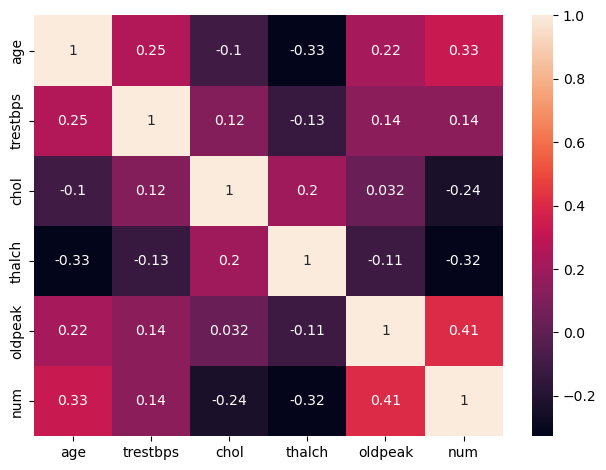

In [88]:
sns.heatmap(data.select_dtypes(include="number").corr(),annot=True)
plt.tight_layout()
plt.show()

In [89]:
for col in object:
    print(data[col].value_counts())
    print("\n")

sex
Male      717
Female    190
Name: count, dtype: int64


cp
asymptomatic       495
non-anginal        202
atypical angina    165
typical angina      45
Name: count, dtype: int64


fbs
False    722
True     185
Name: count, dtype: int64


restecg
normal              542
lv hypertrophy      187
st-t abnormality    178
Name: count, dtype: int64


exang
False    516
True     336
TURE      36
FALSE     19
Name: count, dtype: int64


slope
flat           453
upsloping      298
downsloping    156
Name: count, dtype: int64


thal
normal               385
reversable defect    346
fixed defect         176
Name: count, dtype: int64




In [90]:
data.exang=data.exang.replace({"TURE":True,"FALSE":False})

C:\Users\rosha\AppData\Local\Temp\ipykernel_4688\2373750727.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.exang=data.exang.replace({"TURE":True,"FALSE":False})
C:\Users\rosha\AppData\Local\Temp\ipykernel_4688\2373750727.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data.exang=data.exang.replace({"TURE":True,"FALSE":False})


In [91]:
data.exang=data.exang.replace({"True":1,"False":0})

In [92]:
data.exang.value_counts()

exang
False    535
True     372
Name: count, dtype: int64

In [93]:
le=LabelEncoder()
for col in object:
    data[col]=le.fit_transform(data[col])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,0,125,0,0,1,120,0,1.5,2,2,4
903,62,1,0,166,170,0,2,120,1,3.0,1,2,4
904,56,1,2,170,0,0,0,123,1,2.5,0,1,4
905,56,1,2,144,208,1,2,105,1,0.5,0,0,4


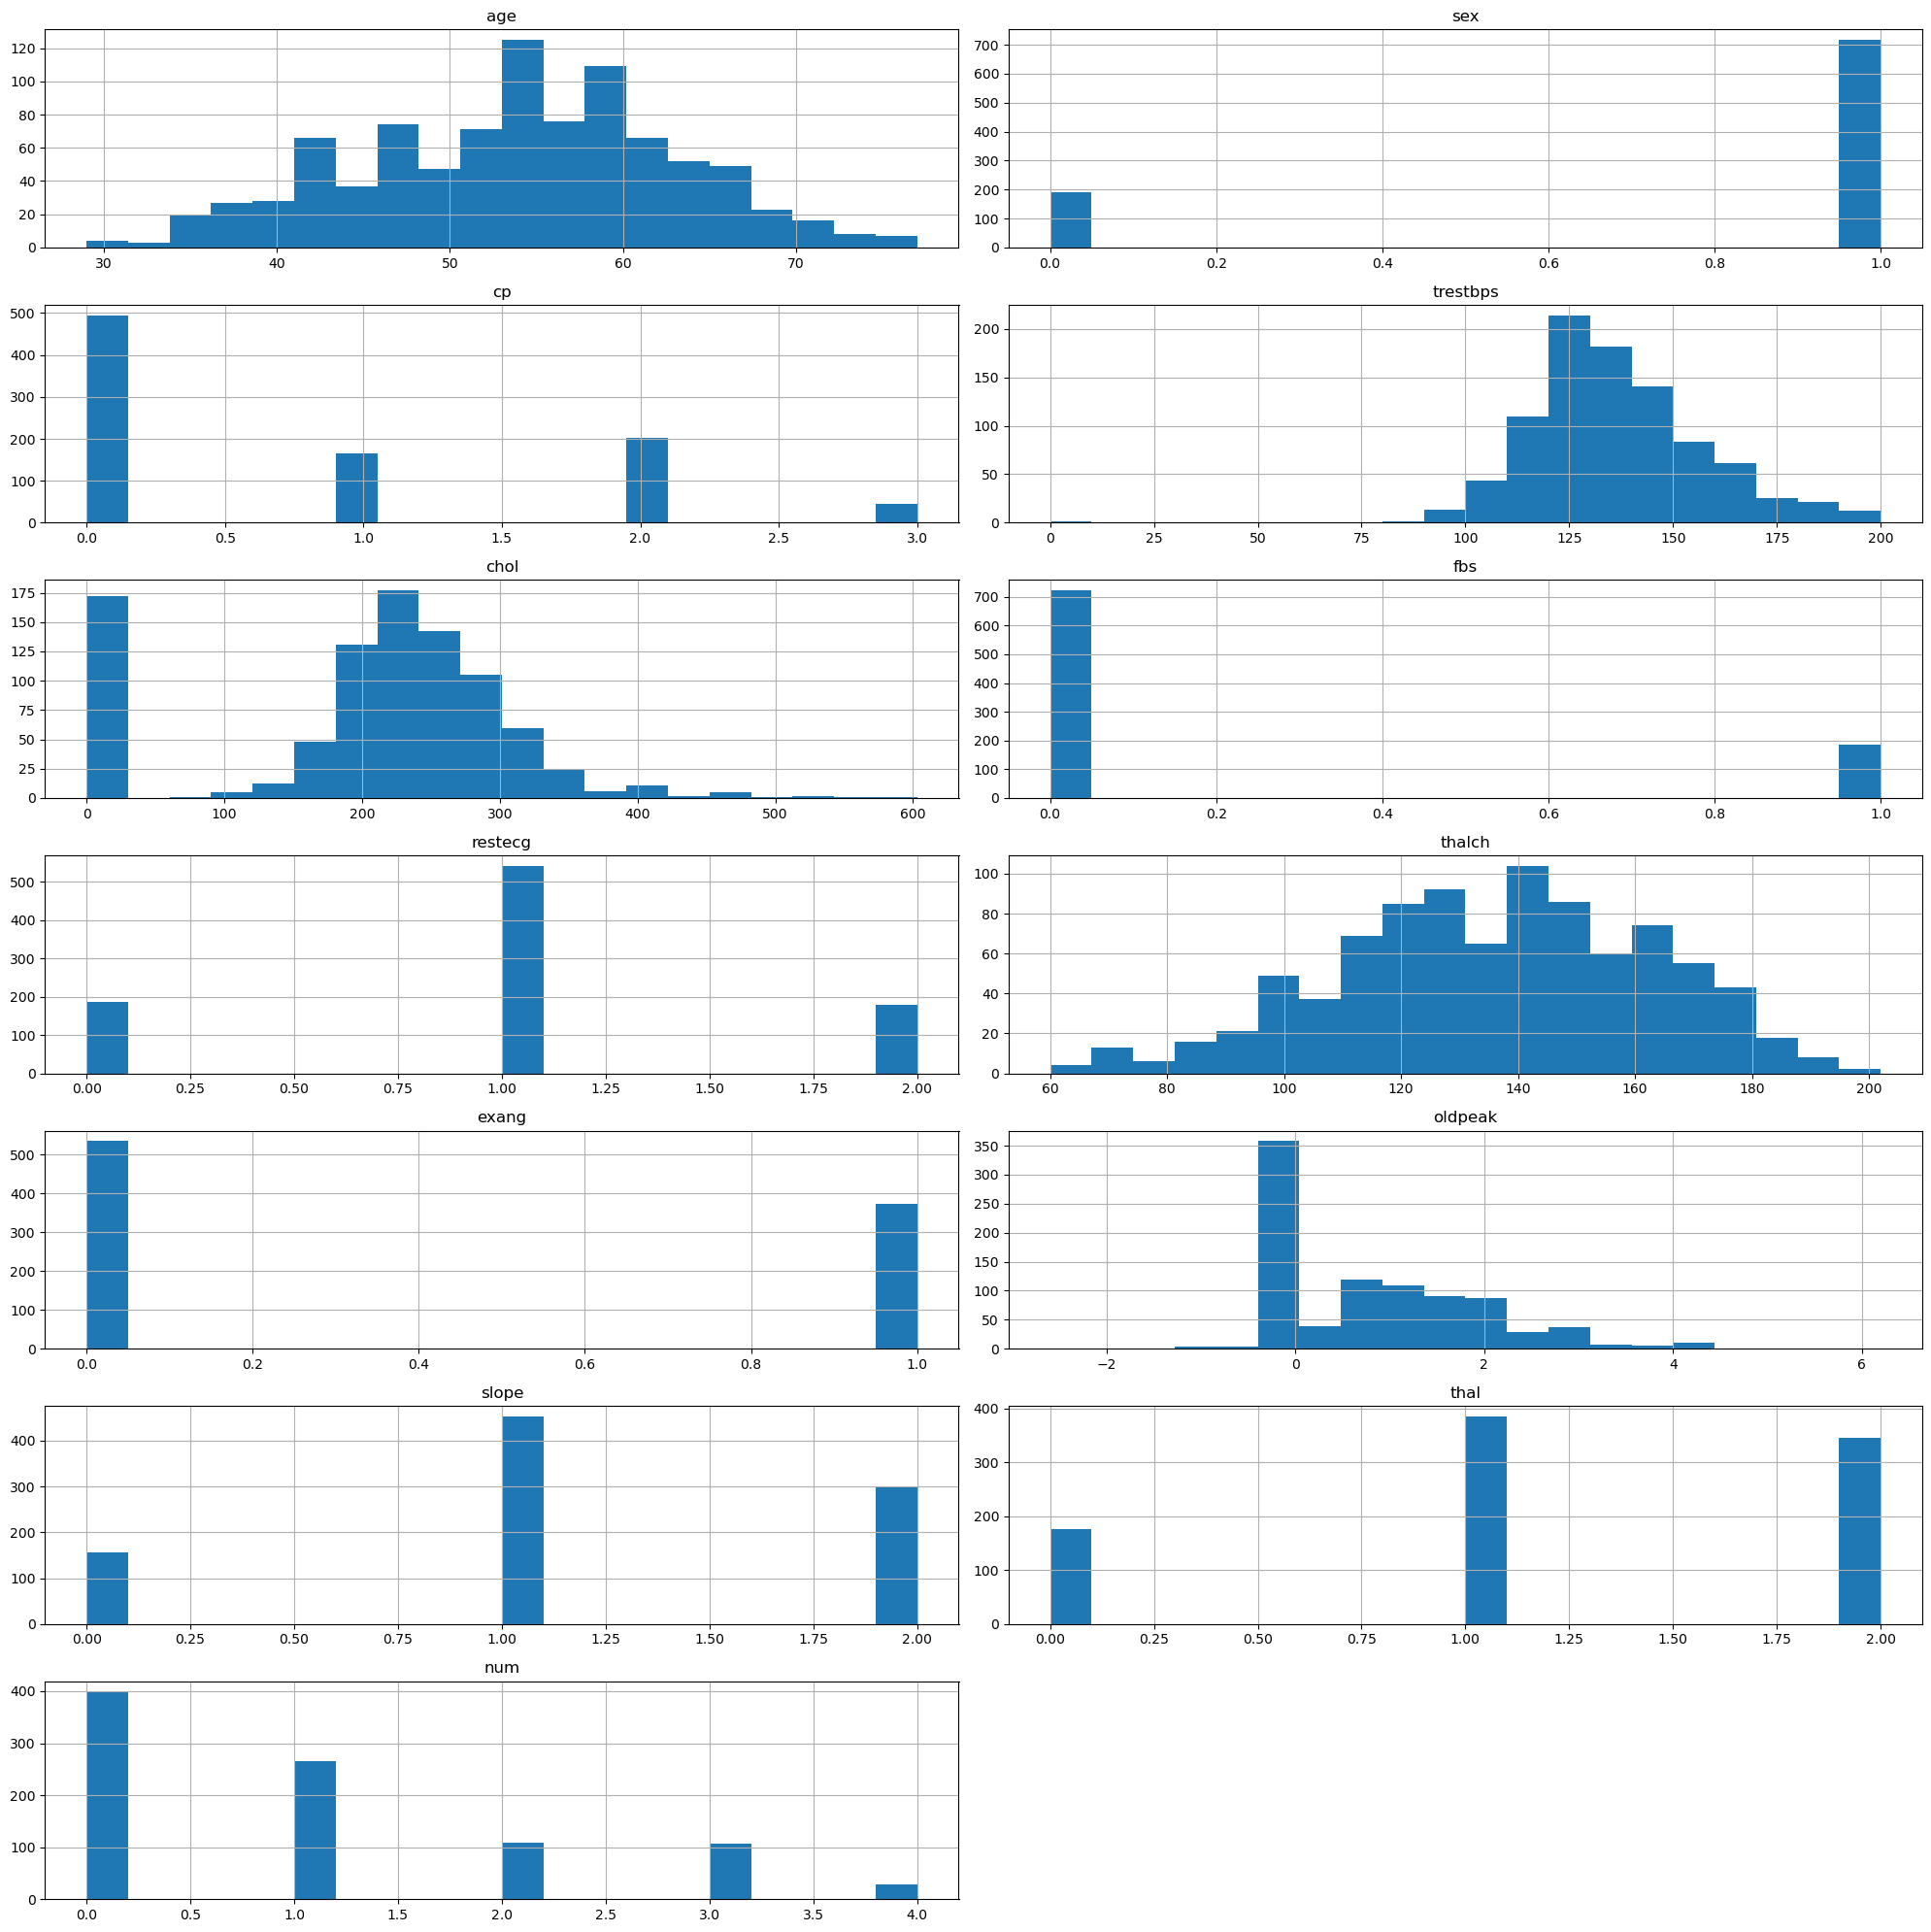

In [94]:
data.hist(bins=20,figsize=(20,20),layout=(7,2))
plt.tight_layout()
plt.show()

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int32  
 2   cp        907 non-null    int32  
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int32  
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    int64  
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    int32  
 11  thal      907 non-null    int32  
 12  num       907 non-null    int64  
dtypes: float64(1), int32(5), int64(7)
memory usage: 74.5 KB


In [96]:
data.skew()

age        -0.135354
sex        -1.430189
cp          0.799478
trestbps    0.355942
chol       -0.563965
fbs         1.471767
restecg     0.008065
thalch     -0.221485
exang       0.365981
oldpeak     1.115458
slope      -0.216112
thal       -0.310174
num         0.954221
dtype: float64

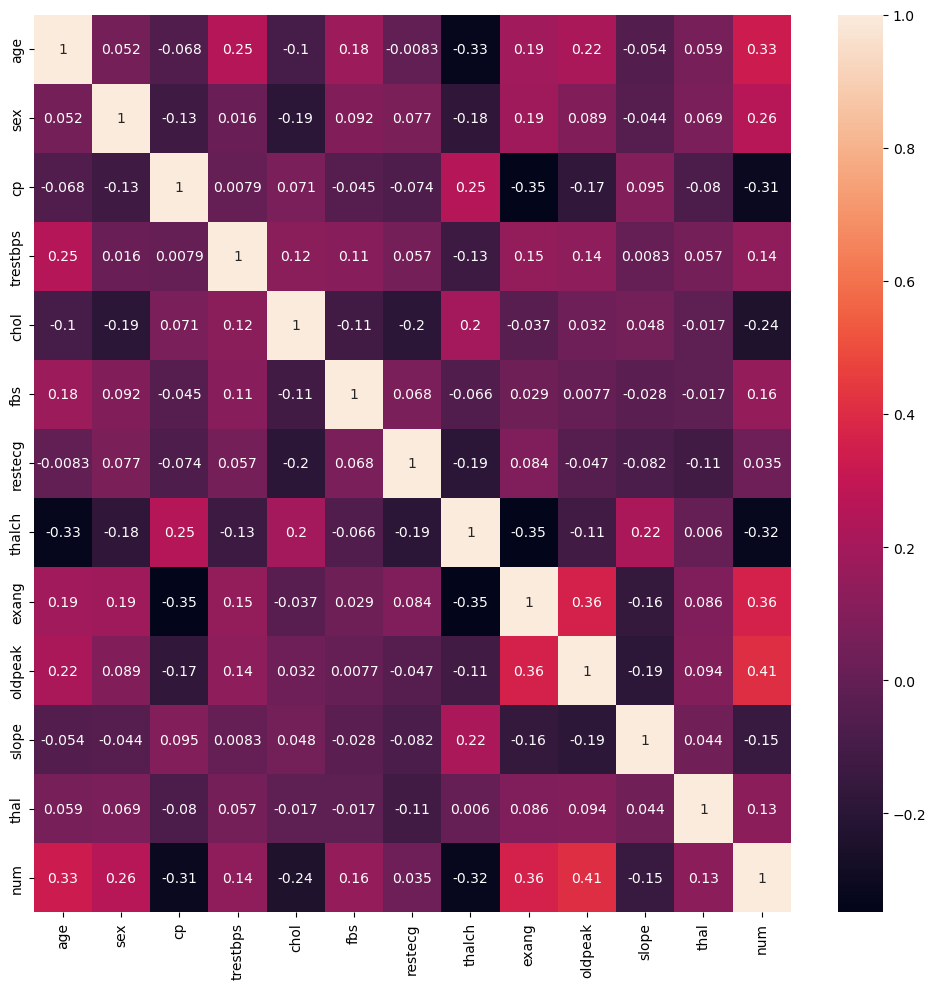

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.tight_layout()
plt.show()

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [99]:
x=data.drop("num",axis=1)
y=data.num

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [101]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [102]:
dtc.score(x_test,y_test)

0.5

In [103]:
y_pred=dtc.predict(x_test)

In [104]:
accuracy_score(y_test,y_pred)

0.5

In [105]:
confusion_matrix(y_test,y_pred)

array([[61, 17,  3,  7,  1],
       [10, 20,  6, 10,  1],
       [ 3,  4,  6,  6,  1],
       [ 3,  6,  4,  4,  0],
       [ 1,  5,  2,  1,  0]], dtype=int64)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        89
           1       0.38      0.43      0.40        47
           2       0.29      0.30      0.29        20
           3       0.14      0.24      0.18        17
           4       0.00      0.00      0.00         9

    accuracy                           0.50       182
   macro avg       0.32      0.33      0.32       182
weighted avg       0.53      0.50      0.51       182



In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid={
    'max_depth':[2, 4, 6, 8, 10,3,5,6,7,9],
    'min_samples_split':[2, 5, 10,3,4,6,7,8,9],
    'criterion':['gini','entropy'],
     'min_samples_leaf': [1, 2, 4,3,5,6,7,8,9] 
}
grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 3, 5, 6, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 3, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 5, 10, 3, 4, 6, 7, 8, 9]})

In [109]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [110]:
grid.best_score_

0.5203994900127497

In [120]:
best=DecisionTreeClassifier(criterion='entropy',
 max_depth= 4,
 min_samples_leaf= 9,
 min_samples_split= 2,random_state=42)

In [121]:
best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=9,
                       random_state=42)

In [115]:
best.score(x_test,y_test)

0.6043956043956044

In [116]:
y_best=best.predict(x_test)
accuracy_score(y_test,y_best)

0.6043956043956044

In [122]:
best.score(x_train,y_train)

0.6

In [ ]:
print(classification_report(y_test,y_best))

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

After evaluating the Decision Tree Classifier (criterion='entropy', max_depth=4, min_samples_leaf=8, random_state=42), the model achieved an overall accuracy of 0.58 on the test set, indicating moderate predictive performance.

Class-wise results show that Class 0 achieved the highest performance with precision = 0.70, recall = 0.83, and F1-score = 0.76, demonstrating the model’s strong ability to identify this majority class. In contrast, Classes 2, 3, and 4 show very low recall and F1-scores, suggesting that the model struggles to correctly classify minority categories—likely due to class imbalance and limited model complexity.

The macro-averaged F1-score of 0.30 and weighted F1-score of 0.53 confirm that while the model performs reasonably on frequent classes, its performance across all classes is inconsistent.

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(best,class_names=['No Disease','1Disease','2Disease','3Disease','4Disease'],feature_names=x.columns,filled=True,rounded=True,fontsize=10)
plt.title('Decision Tree Structure')
plt.show()

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
max_depth: Limits the depth of the tree to prevent overfitting.
min_samples_split: Minimum number of samples required to split a node; higher values reduce overfitting.
criterion (gini or entropy) determines the function to measure the quality of a split.
min_samples_leaf: Sets the minimum number of samples at a leaf node; useful for smoothing the model.

2. What is the difference between Label Encoding and One-Hot Encoding?
Label Encoding assigns an integer value to each category (e.g., Red=0, Blue=1). It introduces ordinal relationships which may mislead some models.
One-Hot Encoding creates binary columns for each category, avoiding any implicit order, making it ideal for nominal (non-ordinal) data.
One-hot is generally safer for ML models that assume numerical distance between values.